# BE 240 Lecture : 2

## Non-mass action propensities in bioscrape
### _Ayush Pandey_

### Biochemical Signalling Model

A signal $S$ cooperatively binds to a transcription factor $F^0$ changing its conformation to $F^1$. $F^1$ binds to a gene $G^0$ activating it to $G^1$. A polymerase $P$ can bind to $G^1$ and then transcribes a transcript $T$. The transcript can bind to a ribosome $R$ and be translated to a protein $X$. The signalling molecule, transcripts, proteins are assumed to degrade via dilution. Cellularly machinery ($F$, $P$, $R$) and DNA ($G$) are assumed to be a constant concentration.


\begin{align}
2 S + F^0 &\underset{k^u_1}{\overset{k^b_1}\rightleftharpoons} F^1\\
F^1 + G^0 &\underset{k^u_2}{\overset{k^b_2}\rightleftharpoons} G^1 \\
G^1 + P &\underset{k^u_3}{\overset{k^b_3}\rightleftharpoons} G^1 :P \xrightarrow{k_{tx}} G^1 + P + T \\
T + R &\underset{k^u_4}{\overset{k^b_4}\rightleftharpoons} T :R \xrightarrow{k_{tl}} T + R + X \\
S &\xrightarrow{\delta} \emptyset \\
T &\xrightarrow{\delta} \emptyset \\
X &\xrightarrow{\delta} \emptyset
\end{align}

Using mass-action approximations, we can write a differential equation that describes the dynamics of each species. For example, if $C_1 = G^1:P$ and $C_2 = T:R$, we have the following mRNA dynamics using mass-action propensities:


\begin{align}
\frac{dT}{dt} = k_{tx}C_1 + (k_{tl} + k_4^u) C_2 - k_4^b T R - \delta T\\ 
\\
\end{align}


* **How do we model the fact that some binding/unbinding reactions are fast reactions compared to the catalysis reactions?**


* **Moreover, if we are only interested in the dynamics of the protein production, can we write simpler models that express the effective dynamics appropriately?**

# Reduced model representations

## Time-Scale Separation

* **QSSA : Quasi steady-state approximation**. In a dynamic model, if a species exhibits a different intrinsic time scale and tends to reach an equilibrium state quicker than others, then we approximate such a species by its quasi steady state. For example, in the above example, if the binding and unbinding reaction of the transcript with the RNAP are fast, we can assume that the complex $C_1$ is at QSS. We can then write,
\begin{align}
\frac{dC_1}{dt} = 0
\end{align}
On solving the above, we get an algebraic relationship for $C_1$ as function of other species that we can substitute into all other equations to eliminate $C_1$ dynamics from the model.
* Formally, singular perturbation theory is a mathematical tool to derive QSSA conditions and steady state expressions. For a rigorous mathematical treatment of time-scale separation as applied to biological systems, refer to Chapter 3 of [[1]](http://www.cds.caltech.edu/~murray/books/AM08/pdf/bfs-dynamics_14Sep14.pdf) and for more information on singular perturbation theory refer to [[2]](https://books.google.com/books/about/Nonlinear_Systems.html?id=t_d1QgAACAAJ)

[1]: Del Vecchio, Domitilla, and Richard M. Murray. Biomolecular Feedback Systems. Princeton, NJ: Princeton University Press, 2015.

[2]: Khalil, Hassan K., and Jessy W. Grizzle. Nonlinear Systems. Vol. 3. Upper Saddle River, NJ: Prentice hall, 2002.

## Conservation Laws

If a species in a model is conserved in amount, but undergoes chemical reactions, we can write a conservation law that relates the total amount of that species with the various amounts in which that species is present in the system. We can use these conservation laws to eliminate redundant dynamics from our system models. We will demonstrate these techniques using a simple example.

## A Simple Example: An Enzymatic Reaction System
\begin{align}
    E + S &\underset{d}{\overset{a}\rightleftharpoons} C \xrightarrow{k} P + E 
\end{align}
Here, $C$ is the complex formed when the enzyme (E) binds to the substrate (S). P is the product resulting from the modification of the substrate S due to the binding with the enzyme E. Refer to [1] for more information.
The full mass-action kinetics based model with four species is given by:
\begin{align*}
\frac{dS}{dt} &= -aES + dC \\
\frac{dC}{dt} &= aES - (d+k) C\\
\frac{dE}{dt} &= -a ES + dC + kC \\
\frac{dP}{dt} &= kC
\end{align*}

The total enzyme concentration is usually assumed to be constant. Hence, we get the following **conservation law**:
\begin{align}
E + C = E_{tot}
\end{align}
We can eliminate E from the system dynamics by substituting $E = E_{tot} - C$. 

**Time-Scale Separation Assumption**:


Next, we assume that the binding and unbinding reactions are at a faster time-scale than the catalysis reaction. Hence, we assume QSSA for C:
\begin{align}
\frac{dC}{dt} &= 0 \Rightarrow a(E_{tot} − C)S − (d+k)C = 0\\
\Rightarrow C &= \frac{E_{tot} S }{S+ K_m}, \quad K_m = \frac{d + k}{a}\\
\\
\end{align}


The reduced model then becomes:
\begin{align}
\frac{dP}{dt} &= rate . \frac{S}{S+ K_m}\\
\\
\end{align}


This is a positive hill function with $n = 1$, $K = K_m$, and rate$ = k E_{tot}$.
The mathematical conditions on the parameters under which this assumption is justified are discussed in [1]. 


[1]: Del Vecchio, Domitilla, and Richard M. Murray. Biomolecular Feedback Systems. Princeton, NJ: Princeton University Press, 2015

**All other kinds of Hill functions can be derived in a similar fashion. Near the end of BE240, we will discuss tools to do these model reduction techniques using an automated package.**



**Here is a list of the Hill function propensities available in bioscrape:**

1. Positive Hill 
\begin{align}
rate \times \frac{X^n}{K^n + X^n}\\
\\
\end{align}

1. Negative Hill 
\begin{align}
rate \times \frac{K^n}{K^n + X^n}\\
\\
\end{align}




1. Positive Proportional Hill 
\begin{align}
rate \times d \times \frac{X^n}{K^n + X^n}\\
\\
\end{align}

1. Negative Proportional Hill 
\begin{align}
rate \times d \times \frac{K^n}{K^n + X^n}\\
\\
\end{align}

Here $X$ and $d$ are species identifiers and $K$ and $rate$ are parameters. Detailed description of non-massaction propensities is available on the [bioscrape wiki](https://github.com/ananswam/bioscrape/wiki/Propensities).

An [interactive tool](https://www.physiologyweb.com/calculators/hill_equation_interactive_graph.html) online to practice your Hill functions!


### Assignment: Try to write bioscrape models for the enzymatic reaction system - 
* full dynamics
* reduced dynamics with a Hill function. 

### Compare the results and find the parameter regime in which the reduced model works. Solution available in Chapter 3 of [1].



[1]: Del Vecchio, Domitilla, and Richard M. Murray. Biomolecular Feedback Systems. Princeton, NJ: Princeton University Press, 2015

## Example 2 : Using bioscrape non-mass action propensities 
Consider the transcription-translation model where $G$ is a gene, $T$ is a transcript, $X$ is a protein.
We can write the following reduced order dynamics:
1. $G \xrightarrow[]{\rho_{tx}(G, S)} G + T$; 
\begin{align} 
\rho_{tx}(G, S) = G k_{tx}\frac{S^{2}}{K_{S}^{2}+S^{2}}
\\
\end{align}
Here, $S$ is the inducer signal that cooperatively activates the transcription of the gene $G$. Since, this is a positive activation of the gene by the inducer, we have a positive proportional Hill function.

2. $T \xrightarrow[]{\rho_{tl}(T)} T+X$; 
\begin{align} 
\rho_{tl}(T) = k_{tl} \frac{T}{K_{R} + T}
\\
\end{align}
The parameters $k_{tl}$ and $K_R$ model effects due to ribosome saturation. This is the similar Hill function as derived in the enzymatic reaction example. 

3. $T \xrightarrow[]{\delta} \varnothing$; massaction kinetics at rate $\delta$.
4. $X \xrightarrow[]{\delta} \varnothing$; massaction kinetics at rate $\delta$.

The first reaction uses a proportional positive hill function as its rate function to represent induction. The second reaction uses a positive hill function function to represent ribosome saturation. The third and fourth reactions reaction represent degredation via dilution. This model is constructed below and simulated both stochastically and deterministically.

In [22]:
from bioscrape.simulator import py_simulate_model
from bioscrape.types import Model

#Create a list of species names (strings)
species = ["G", "T", "X", "S"]

#create a list of parameters in the form (param_name[string], param_val[number])
params = [("ktx", 2), ("ktl", 5), ("KI", 10), ("n", 2.0), ("KR", 20), ("delta", .1)]

#create reaction tuples in the form:
#(Inputs[string list], Outputs[string list], propensity_type[string], propensity_dict {propensity_param:model_param})
rxn1 = (["G"], ["G", "T"], "proportionalhillpositive", {"d":"G", "s1":"S", "k":"ktx", "K":"KI", "n":"n"})
rxn2 = (["T"], ["T", "X"], "hillpositive", {"s1":"T", "k":"ktl", "K":"KR", "n":1}) 

# Or alternatively, use general propensity (simulation will be slower):
# rxn2 = (["T"], ["T", "X"], "general", {"rate":"ktl * T/(KR + T)"})

#Notice that parameters can also take numerical values instead of being named directly
rxn3 = (["T"], [], "massaction", {"k":"delta"})
rxn4 = (["X"], [], "massaction", {"k":"delta"})


In [23]:
#Create a list of all reactions
rxns = [rxn1, rxn2, rxn3, rxn4]

#create an initial condition dictionary species not included in the dictionary will default to 0
x0 = {"G":1, "S":200}

#Instaniate the Model object
M = Model(species = species, parameters = params, reactions = rxns, initial_condition_dict = x0)

#Simulate the Model deterministically
timepoints = np.arange(0, 150, .1)
results_det = py_simulate_model(timepoints, Model = M) #Returns a Pandas DataFrame

#Simulate the Model Stochastically
results_stoch = py_simulate_model(timepoints, Model = M, stochastic = True)

C:\Users\apand\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The following species are uninitialized and their value has been defaulted to 0: T, X, 
  


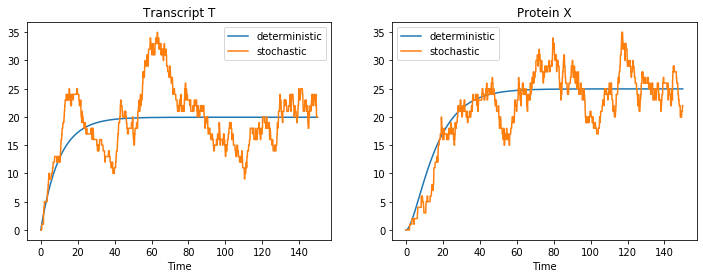

In [24]:
#Plot the results
plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.title("Transcript T")
plt.plot(timepoints, results_det["T"], label = "deterministic")
plt.plot(timepoints, results_stoch["T"], label = "stochastic")
plt.legend()
plt.xlabel("Time")

plt.subplot(122)
plt.title("Protein X")
plt.plot(timepoints, results_det["X"], label = "deterministic")
plt.plot(timepoints, results_stoch["X"], label = "stochastic")
plt.legend()
plt.xlabel("Time")
plt.show()

### More examples / assignments:

1. Can you obtain a reduced model with Hill functions for the signaling system discussed earlier? Using the various techniques discussed in this lecture, write that model using bioscrape. Simulate and compare with full model dynamics (with massaction propensities) from Lecture 1 [here](http://www.cds.caltech.edu/%7Emurray/courses/be240/sp2020/W2_bioscrape.ipynb).

2. For the repressilator model in [[1](https://www.nature.com/articles/35002125)], write a bioscrape model using non-massaction propensities

3. A transcription-translation model using non-massaction propensities is available in `Basic Examples --- START HERE.ipynb` in the `bioscrape/examples` directory. 

4. Another such model is given next. Feel free to explore this code.

In [1]:
## Example not shown in lecture

import numpy as np
import pylab as plt
from bioscrape.simulator import *
from bioscrape.types import *
import warnings


#Parameter ranges to randomly choose parameters (on a log scale)
param_min = -2
param_max = 2

#Names of different supported propensities
propensity_types = ['massaction', 'hillpositive', 'proportionalhillpositive', 'hillnegative', 
                    'proportionalhillnegative', 'massaction']#, 'general']

#parameter names required for each propensity (general will be treated by itself)
propensity_param_requirements = {
	'massaction':['k'], 'hillpositive':['k', 'K', 'n'], 'hillnegative':['k', 'K', 'n'],
	'proportionalhillpositive':["k", "K", "n"], 'proportionalhillnegative':["k", "K", "n"]
}
#species (passed in as parameters) required for each propensity (general will be treated by itself)
propensity_specie_requirements = {
	'hillpositive':['s1'], 'hillnegative':['s1'], 'proportionalhillpositive':['s1', 'd'], 
    'proportionalhillnegative':['s1', 'd'], "massaction":[]
}


species = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
n_species = len(species)
n_reactions = np.random.randint(1, 3)

reactions = []
for r in range(n_reactions):

    try_again = True
    while try_again:#Loop ensures no positive feedback which leads to long simulations
        inputs = []
        outputs = []
        while(len(inputs) == 0 and len(outputs) == 0):

            n_inputs = np.random.randint(0, 5)
            for i in range(n_inputs):
                inputs.append(species[np.random.randint(0, len(species))])

            n_outputs = np.random.randint(0, 5)
            for i in range(n_outputs):
                outputs.append(species[np.random.randint(0, len(species))])

        inputs_in_outputs = len([i for i in inputs if i in outputs])
        if inputs_in_outputs >= len(inputs):
            try_again = True
        else:
            try_again = False

    prop_type = propensity_types[np.random.randint(0, len(propensity_types))]
    param_dict = {}
    if prop_type != 'general':
        required_params = propensity_param_requirements[prop_type]
        required_species = propensity_specie_requirements[prop_type]
        param_dict = {}
        for p in required_params:
            param_dict[p] = round(np.exp(np.random.uniform(low = param_min, high = param_max)), 3)
        for i in range(len(required_species)):
            k = required_species[i]
            param_dict[k] = species[np.random.randint(0, len(species))]

    elif prop_type == 'general': #Here we will use a random(ish) rational function
        rate_str = "(1+"
        numerator_terms = np.random.randint(0, 5)
        denominator_terms = np.random.randint(0, 5)
        for i in range(numerator_terms):
            coef = str(round(np.exp(np.random.uniform(low = param_min, high = param_max)), 3))
            exp = str(round(np.random.uniform(low = 0, high = param_max), 3))
            specie = species[np.random.randint(0, len(species))]
            rate_str += coef+"*"+specie+"^"+exp+"+"
        rate_str =  rate_str[:-1] + ")"
        rate_str += "/(1+"
        for i in range(denominator_terms):
            coef =str(round(np.exp(np.random.uniform(low = param_min, high = param_max)), 3))
            exp = str(round(np.random.uniform(low = 0, high = param_max), 3))
            specie = species[np.random.randint(0, len(species))]
            rate_str += coef+"*"+specie+"^"+exp+"+"
        rate_str =  rate_str[:-1] + ")"
        param_dict['rate'] = rate_str

    rxn = (inputs, outputs, prop_type, param_dict)
    reactions.append(rxn)


print("Bioscrape model #rxns=", len(reactions), "\nrxns=", reactions)
M = Model(reactions = reactions, initial_condition_dict = {s:np.random.randint(10, 100) for s in species})
M.write_bioscrape_xml('lecture2_model.xml')
M2 = Model('lecture2_model.xml')
print("Loaded Model \n", M2.get_reactions())

Bioscrape model #rxns= 2 
rxns= [(['D', 'A'], ['E'], 'hillpositive', {'k': 0.295, 'K': 0.69, 'n': 2.166, 's1': 'F'}), (['E', 'F'], ['D', 'G'], 'hillpositive', {'k': 1.19, 'K': 1.24, 'n': 0.143, 's1': 'E'})]
Warning! SpeciesB not currently used in any rules or reactions.
Warning! SpeciesC not currently used in any rules or reactions.
Loaded Model 
 [(<bioscrape.types.PositiveHillPropensity object at 0x0000020B4A0CE990>, <bioscrape.types.NoDelay object at 0x0000020B4A124170>, {'D': -1, 'A': -1, 'E': 1}, {}), (<bioscrape.types.PositiveHillPropensity object at 0x0000020B4A10EA20>, <bioscrape.types.NoDelay object at 0x0000020B4A1240B0>, {'E': -1, 'F': -1, 'D': 1, 'G': 1}, {})]


# Rules in bioscrape
### Adding Rules
In deterministic and stochastic simulations, bioscrape also supports rules which can be used to set species or parameter values during the simulation. Rules are updated every simulation timepoint - and therefore the model may be sensitive to the timepoints spacing.

For example:

1. $I = I_0 H(T)$ where $H$ is the step function. Represents the addition of the inducer I at concentrion $I_0$ some time T. Prior to t=T, I is not present.
2. $S = M \frac{X}{1+aX}$ represents a saturating signal detected from the species X via some sort of sensor.

To implement these rules in bioscrape:
```
# Usage: rule_tuple = (rule_type, rule_dict, rule_frequency)

rule1 = ("assignment", {"equation": "I =_I0*Heaviside(t-_T)"}, "repeated")

rule2 = ("assignment", {"equation": "S = 50*X/(1+.2*X)"}, "repeated")

M = Model(rules = [rule1, rule2])

# Or use create_rule function
```


Rules can also be used for quasi-steady-state or quasi-equilibrium approximations, computing parameters on during the simulation, and much more!

There are two main types of rules:
1. "additive": used for calculating the total of many species. Rule 'equation' must be in the form $s_0 = s_1 + s_2 ...$ where $s_i$ each represents a species string.
2. "assignment": a general rule type with 'equation' of the form $v = f(s, p)$ where $v$ can be either a species or parameter which is assigned the value $f(s, p)$ where $s$ are all the species and $p$ are all the parameters in the model and $f$ is written as an string.


For more information on Rules in bioscrape, refer to the [bioscrape Wiki](https://github.com/ananswam/bioscrape/wiki) and the `Basic Examples --- START HERE.ipynb` notebook in the `bioscrape/examples` directory.

# Bonus content: Local sensitivity analysis
